In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil

In [2]:
np.set_printoptions(formatter={'float': lambda x: format(x, '1.2E')})
nTurn = 256
errIndex = 0
betx = 1.90650539547772
alfx = 1.4082261070868625
emitx = 6.066503e-6
nCore_y = 8
nCore_z = 4
n_particles = 40000
nx = 0
NL_t = 0.4
NL_c = 0.01

# 1. Preparation

In [3]:
beam, lattice = impact.readInputFile('test_IOTA.in')
beam.current = 0.0

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
beam.nCore_y=nCore_y
beam.nCore_z=nCore_z

In [5]:
beam.nCore_y = nCore_y
beam.nCore_z = nCore_z
beam.distribution.emitx = emitx
beam.n_particles = n_particles

ke   = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

print(beam.distribution.emitx/NL_c**2)

0.06066503


In [6]:
beam.n_particles=n_particles
beam.distribution.distribution_type = 'IOTA_Waterbag'
#beam.distribution.distribution_type = 'Waterbag'
beam.distribution.NL_t = NL_t
beam.distribution.NL_c = NL_c

In [7]:
lattice[0].turns = nTurn

for i in range(len(lattice)):
    if 'length' in lattice[i].keys():
        lattice[i].n_sckick = ceil(lattice[i].length*30)
        if lattice[i].type in ['nonlinear_insert','dipole']:
            lattice[i].n_sckick = ceil(lattice[i].length*60)
            lattice[i].n_map = 5
        else:
            lattice[i].n_map = 2
        
lattice = [ item for item in lattice if not item.type == 'write_raw_ptcl' ]

In [8]:
# for i in range(len(lattice)):
#     if 'pipe_radius' in lattice[i].keys() and lattice[i].type!='dipole':
#         #lattice[i].pipe_radius = 1.0
#         lattice[i].pipe_radius = 0.15

In [9]:
L=0.0
for i in range(len(lattice)):
    if 'length' in lattice[i].keys():
        L = L+lattice[i].length
print(L)

39.968229715800106


# 2. Run

In [10]:
print('===========================')
print('=========== run ===========')
print('===========================')

=========== run ===========


In [11]:
impact.writeInputFile(beam,lattice) 
impact.run(beam)

input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles


0

(40000, 9)


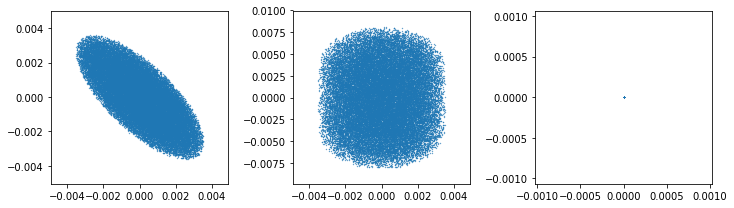

In [12]:
pData = impact.readParticleData(-111110,ke,mass,freq)
print(pData.shape)
plt.figure(figsize=[10.3,3])
plt.subplot(1,3,1)
plt.scatter(pData[:,0],pData[:,1],s=0.1)
plt.subplot(1,3,2)
plt.scatter(pData[:,0],pData[:,2],s=0.1)
plt.subplot(1,3,3)
plt.scatter(pData[:,4],pData[:,5],s=0.1)
plt.tight_layout()

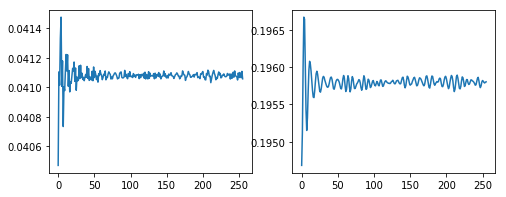

In [13]:
Inv = np.loadtxt('fort.81')
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(Inv[:,1]) 
plt.subplot(1,2,2)
plt.plot(Inv[:,2])